In [1]:
# IMPORT LIBRARIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [2]:

# LOAD DATA

df = pd.read_csv(r"C:\Users\ppati\Downloads\insurance.csv")  
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:

# ENCODE CATEGORICAL FEATURES

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])        # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])  # yes=1, no=0
df['region'] = le.fit_transform(df['region'])  # 4 unique regions

df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


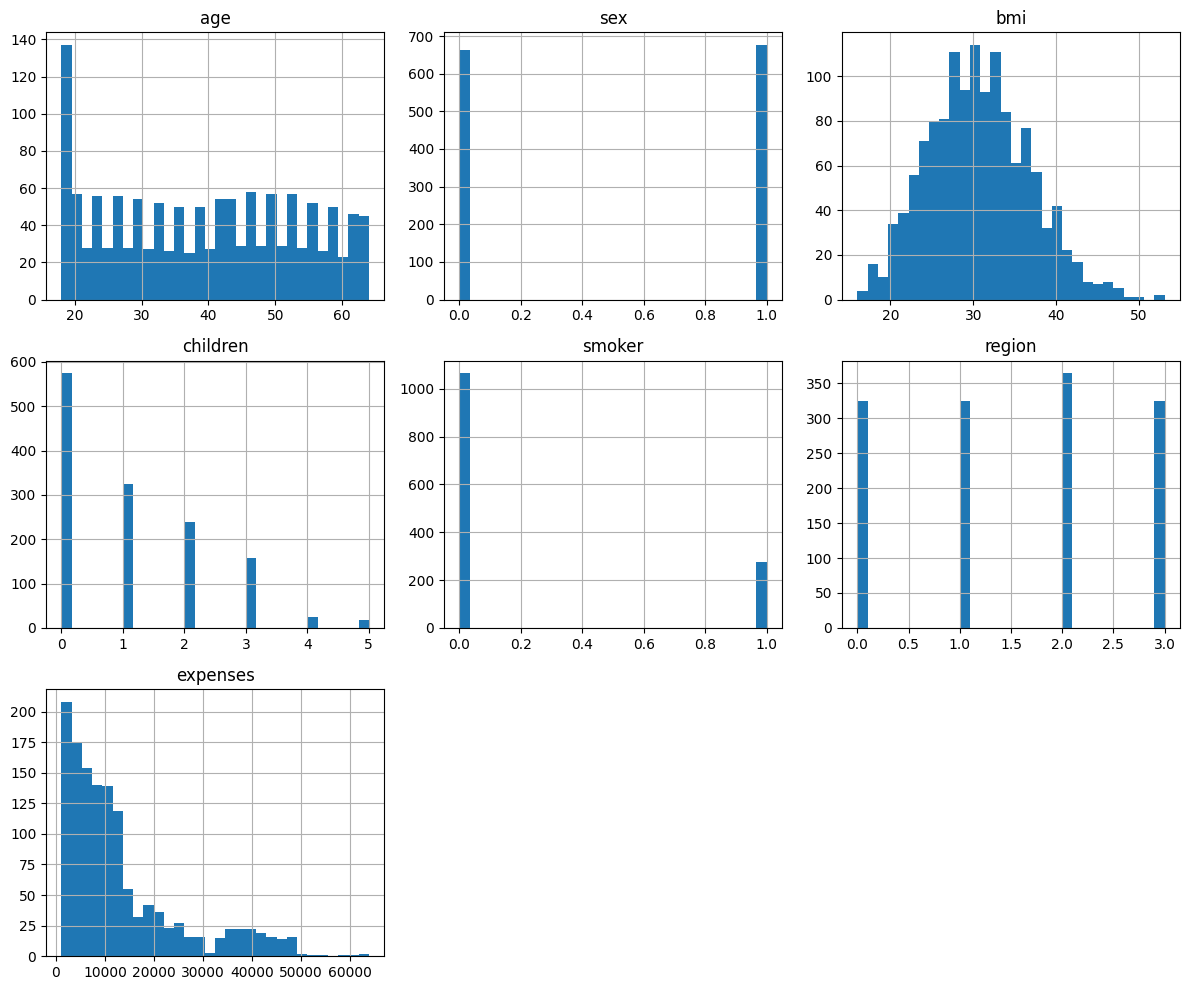

In [4]:

# VISUALIZATION: HISTOGRAM

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


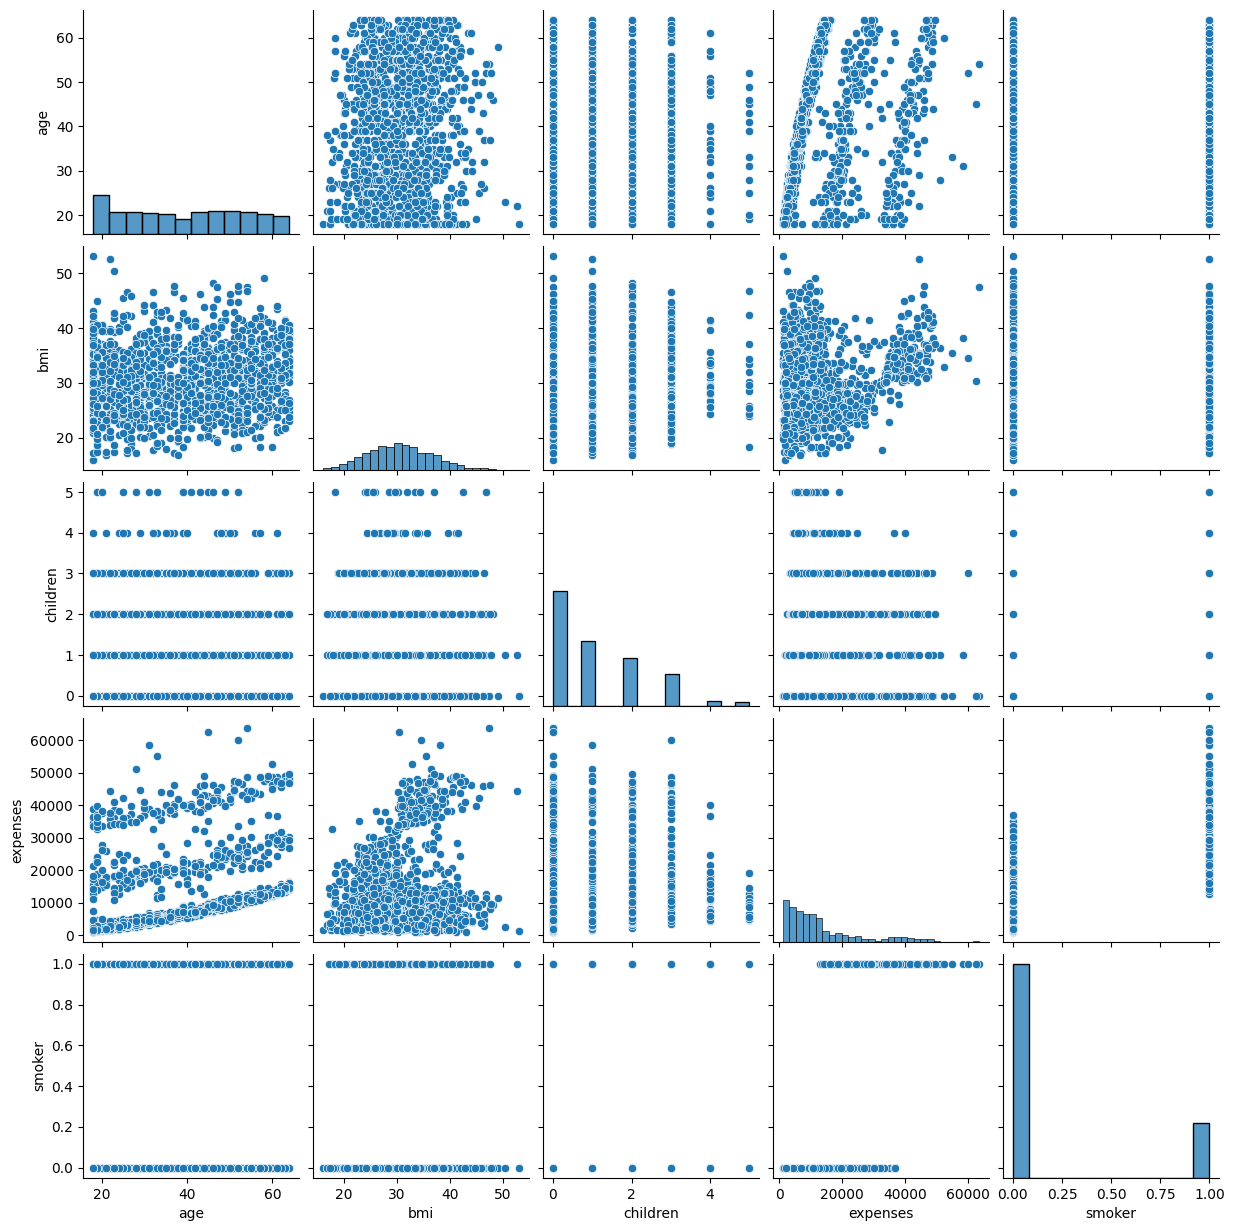

In [5]:

# VISUALIZATION: PAIRPLOT

sns.pairplot(df[['age', 'bmi', 'children', 'expenses', 'smoker']])
plt.show()



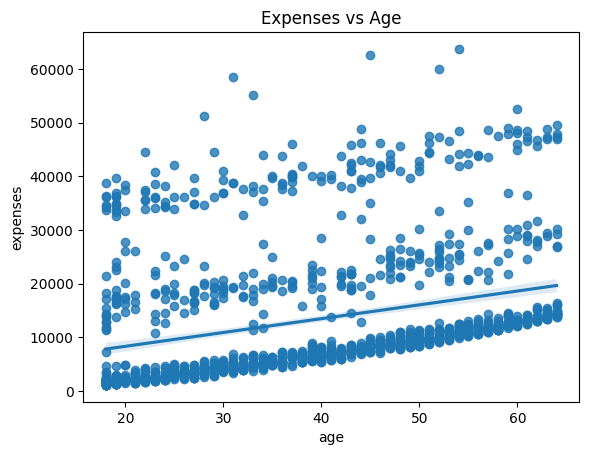

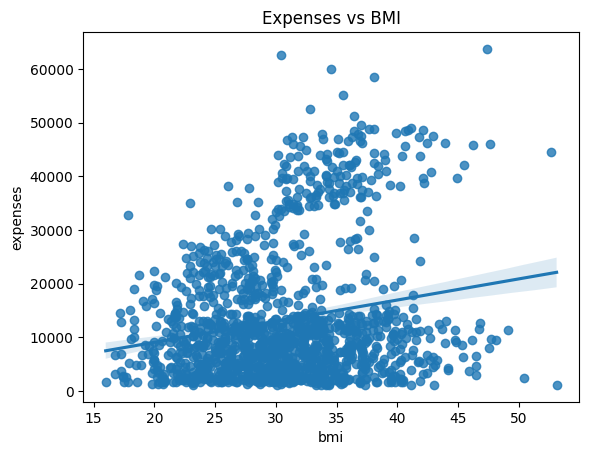

In [6]:
#  Regplot
sns.regplot(x='age', y='expenses', data=df)
plt.title("Expenses vs Age")
plt.show()

sns.regplot(x='bmi', y='expenses', data=df)
plt.title("Expenses vs BMI")
plt.show()


In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ppati\Downloads\insurance.csv")

# Check the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# Display the first few rows of the DataFrame
print(df.head())

# Strip whitespace from column names (if necessary)
df.columns = df.columns.str.strip()

# Define the features (X) and the target (y) before one-hot encoding
y = df['expenses']  # Target variable
X = df.drop('expenses', axis=1)  # Features

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Now X is ready for model training


Columns in the DataFrame: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Linear Regression
print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.2f} %")


Linear Regression Metrics:
MSE: 33600065.35507785
MAE: 4181.561524000795
R2 Score: 0.7835726930039904
Model Accuracy: 78.36 %


In [18]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.2f} %")



Random Forest Regressor Metrics:
MSE: 20902239.06838268
MAE: 2556.0849396108747
R2 Score: 0.8653629014125361
Model Accuracy: 86.54 %


In [19]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate Gradient Boosting Regressor
print("\nGradient Boosting Regressor Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))
r2 = r2_score(y_test, y_pred_gb)
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.2f} %")



Gradient Boosting Regressor Metrics:
MSE: 18694472.575550642
MAE: 2463.8951844651606
R2 Score: 0.8795837355528916
Model Accuracy: 87.96 %


In [20]:

# XGBoost Regressor

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate XGBoost Regressor
print("\nXGBoost Regressor Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.2f} %")





XGBoost Regressor Metrics:
MSE: 20277254.504562728
MAE: 2498.0788785564364
R2 Score: 0.8693885997149708
Model Accuracy: 86.94 %


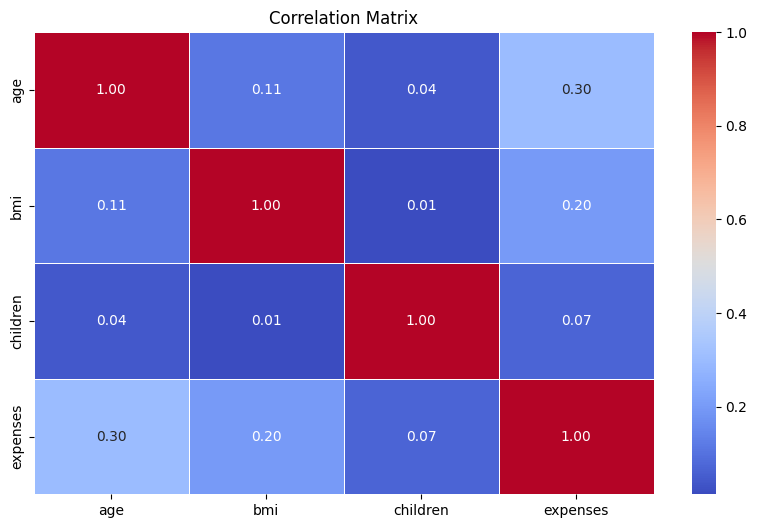

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load or create your DataFrame, e.g., from a CSV file
df = pd.read_csv(r"C:\Users\ppati\Downloads\insurance.csv")

# Now create correlation matrix heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()